# KMeans

Based on <https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html>

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

## Get Data

In [4]:
from common.data import get_data
from common.paths import HEALTHY, ADHD

X, Y, demographics, population = get_data(label_path=ADHD)
ages = demographics['Age']
sexes = demographics['Sex']

print(f'X: {X.shape} | Y: {len(Y.keys())} | Age: {ages.shape} | Population: {population}')

X: (373, 34716) | Y: 6 | Age: (373,) | Population: adhd


In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

## Determine number of clusters

### Silhouette Analysis

In [6]:
%%time

range_n_clusters = [n for n in range(2, 6)]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'Num clusters: {n_clusters} | Avg silhouette score: {silhouette_avg}')

Num clusters: 2 | Avg silhouette score: 0.12292705476284027
Num clusters: 3 | Avg silhouette score: 0.12636087834835052
Num clusters: 4 | Avg silhouette score: 0.06492592394351959
Num clusters: 5 | Avg silhouette score: 0.04043480381369591


### Bayesian Information Criterion

In [10]:
%%time

range_n_clusters = [n for n in range(2, 10)]
bics = []
X_ss = StandardScaler().fit_transform(X)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='diag', reg_covar=1e-5)
    gmm.fit(X_ss)
    bic = gmm.bic(X_ss)
    bics.append(bic)
    print(f'Num clusters: {n_clusters} | BIC: {bic:.2f}')

Num clusters: 2 | BIC: 35516822.41
Num clusters: 3 | BIC: 35179768.63
Num clusters: 4 | BIC: 35015579.59
Num clusters: 5 | BIC: 35310204.80
Num clusters: 6 | BIC: 35443487.08
Num clusters: 7 | BIC: 35759925.53
Num clusters: 8 | BIC: 35663742.96
Num clusters: 9 | BIC: 35907601.24
CPU times: user 5min 56s, sys: 23.1 s, total: 6min 19s
Wall time: 43.3 s


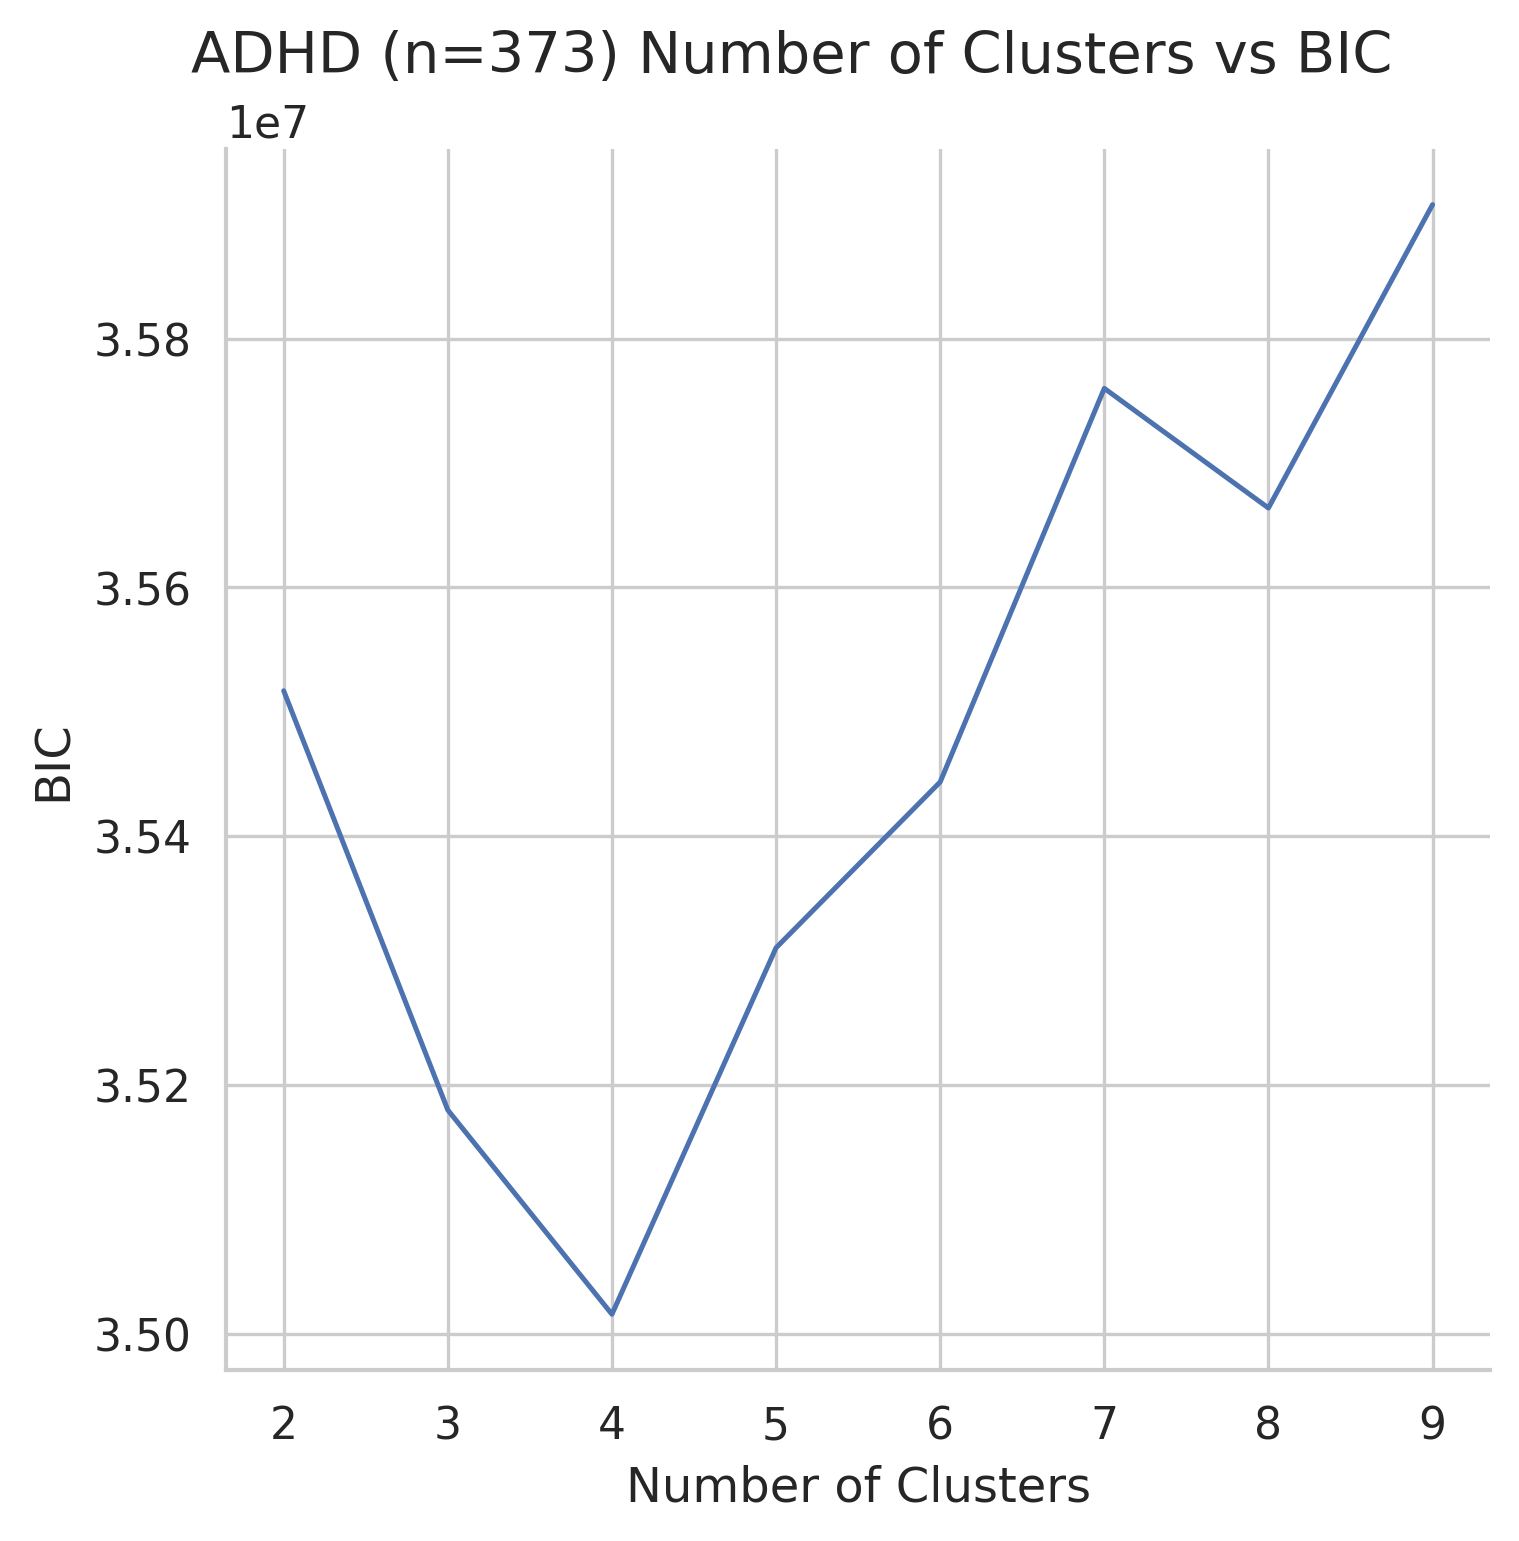

In [12]:
g = sns.relplot(x=range_n_clusters, y=bics, kind="line")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(f'ADHD (n={X.shape[0]}) Number of Clusters vs BIC')
g.set_axis_labels('Number of Clusters', 'BIC')

## Run Clustering

In [13]:
clusters = 4
clusterer = KMeans(n_clusters=clusters)
cluster_labels = clusterer.fit_predict(X)

cluster_indices = []
for cluster in range(0, clusters):
    cluster_indices.append(np.where(cluster_labels == cluster))

In [14]:
ages_clusters = [ages[indices] for indices in cluster_indices]
sexes_clusters = [sexes[indices] for indices in cluster_indices]

for cluster, age_cluster in enumerate(ages_clusters):
    print(f"Cluster {cluster} Age: {np.mean(age_cluster):.2f} ({np.std(age_cluster):.2f})")

print("---")
    
for cluster, sex_cluster in enumerate(sexes_clusters):
    label, counts = np.unique(sex_cluster, return_counts=True)
    print(f"Cluster {cluster} Sex: {label, counts}")
#     print(f"Cluster {cluster} Sex: M={counts[0]} F={counts[1]}")

Cluster 0 Age: 11.12 (2.44)
Cluster 1 Age: 10.86 (2.64)
Cluster 2 Age: 10.94 (2.31)
Cluster 3 Age: 9.56 (2.28)
---
Cluster 0 Sex: (array([0, 1]), array([71, 32]))
Cluster 1 Sex: (array([0, 1]), array([89, 28]))
Cluster 2 Sex: (array([0, 1]), array([33, 12]))
Cluster 3 Sex: (array([0, 1]), array([81, 27]))


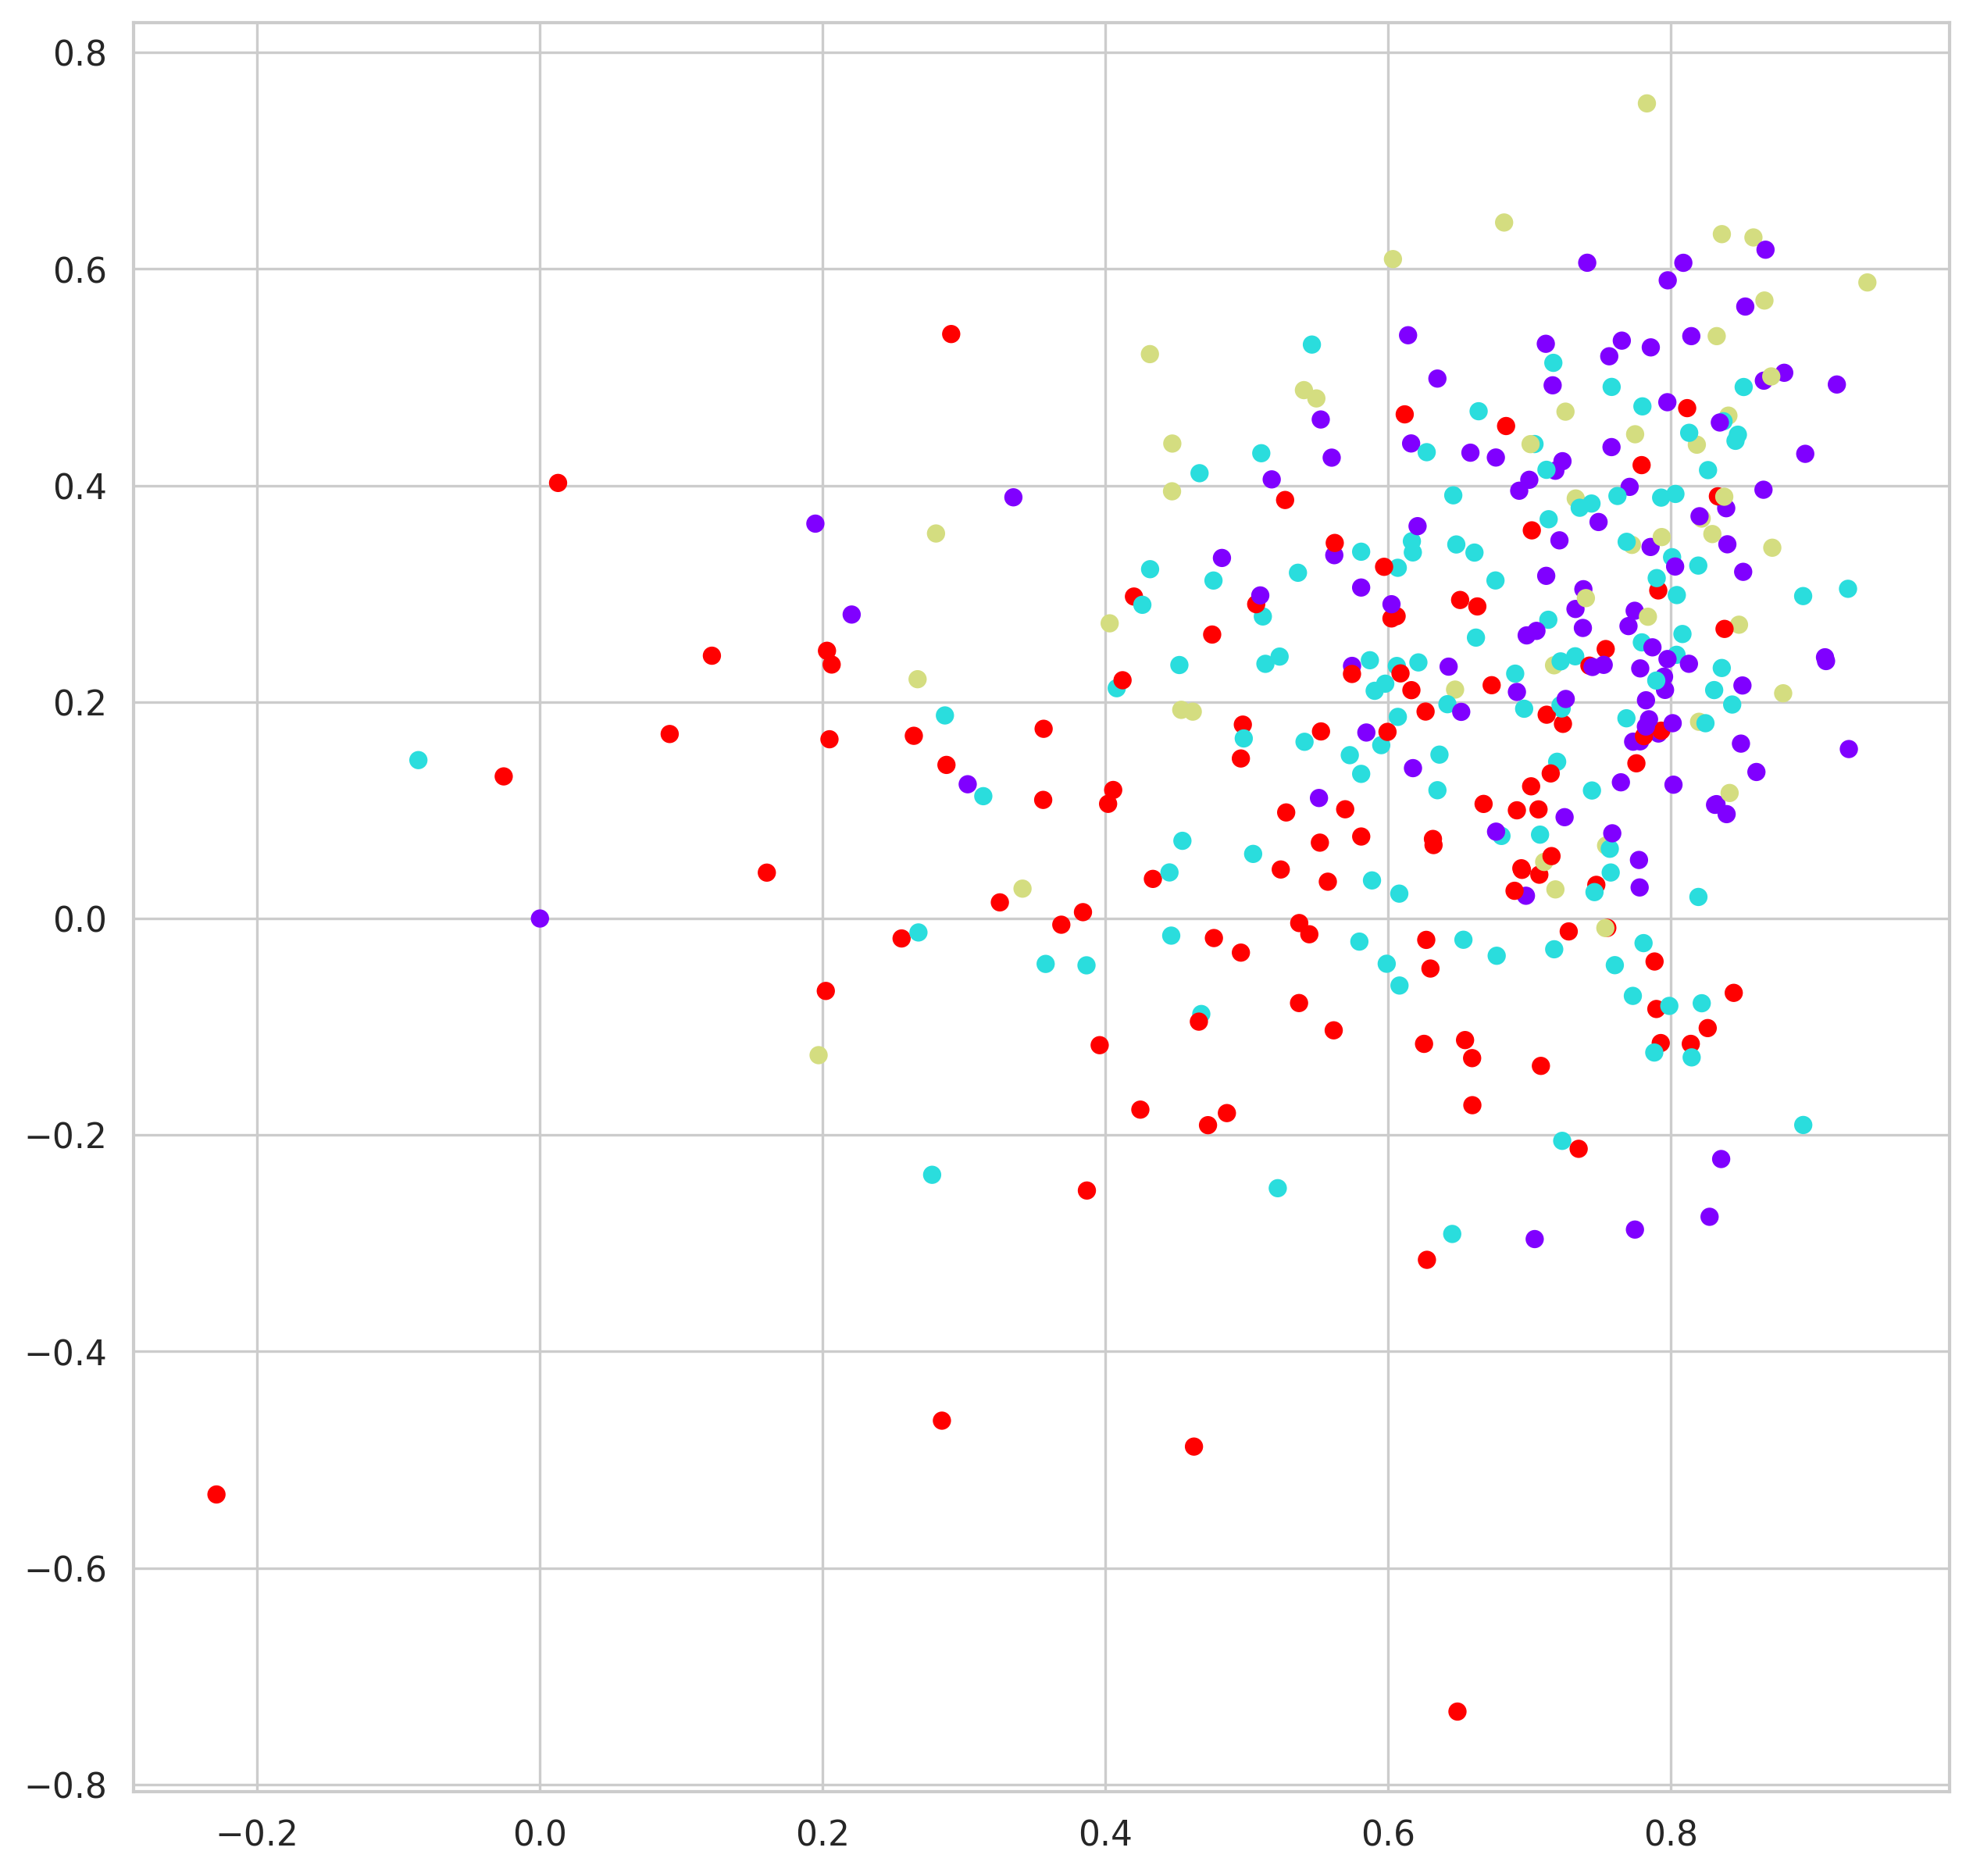

In [15]:
plt.scatter(X[:,0],X[:,1], c=clusterer.labels_, cmap='rainbow')

WISC_FSIQ
Cluster 0 WISC_FSIQ: 100.43 (15.38)
Cluster 1 WISC_FSIQ: 99.35 (17.93)
Cluster 2 WISC_FSIQ: 94.58 (14.36)
Cluster 3 WISC_FSIQ: 102.99 (15.40)
---
WISC_VSI
Cluster 0 WISC_VSI: 101.90 (15.78)
Cluster 1 WISC_VSI: 101.18 (17.90)
Cluster 2 WISC_VSI: 97.11 (14.86)
Cluster 3 WISC_VSI: 106.13 (17.57)
---
WISC_VCI
Cluster 0 WISC_VCI: 105.44 (14.80)
Cluster 1 WISC_VCI: 104.06 (17.13)
Cluster 2 WISC_VCI: 101.22 (12.66)
Cluster 3 WISC_VCI: 107.32 (16.24)
---
WISC_FRI
Cluster 0 WISC_FRI: 101.77 (15.73)
Cluster 1 WISC_FRI: 99.49 (17.66)
Cluster 2 WISC_FRI: 97.76 (15.37)
Cluster 3 WISC_FRI: 104.40 (14.65)
---
WISC_WMI
Cluster 0 WISC_WMI: 99.51 (13.99)
Cluster 1 WISC_WMI: 98.71 (16.35)
Cluster 2 WISC_WMI: 94.40 (14.56)
Cluster 3 WISC_WMI: 99.16 (14.94)
---
WISC_PSI
Cluster 0 WISC_PSI: 93.14 (15.27)
Cluster 1 WISC_PSI: 95.68 (15.81)
Cluster 2 WISC_PSI: 91.62 (14.99)
Cluster 3 WISC_PSI: 92.79 (14.84)
---


Text(0.5, 1.0, 'KMeans: WISC Box Plot per Cluster')

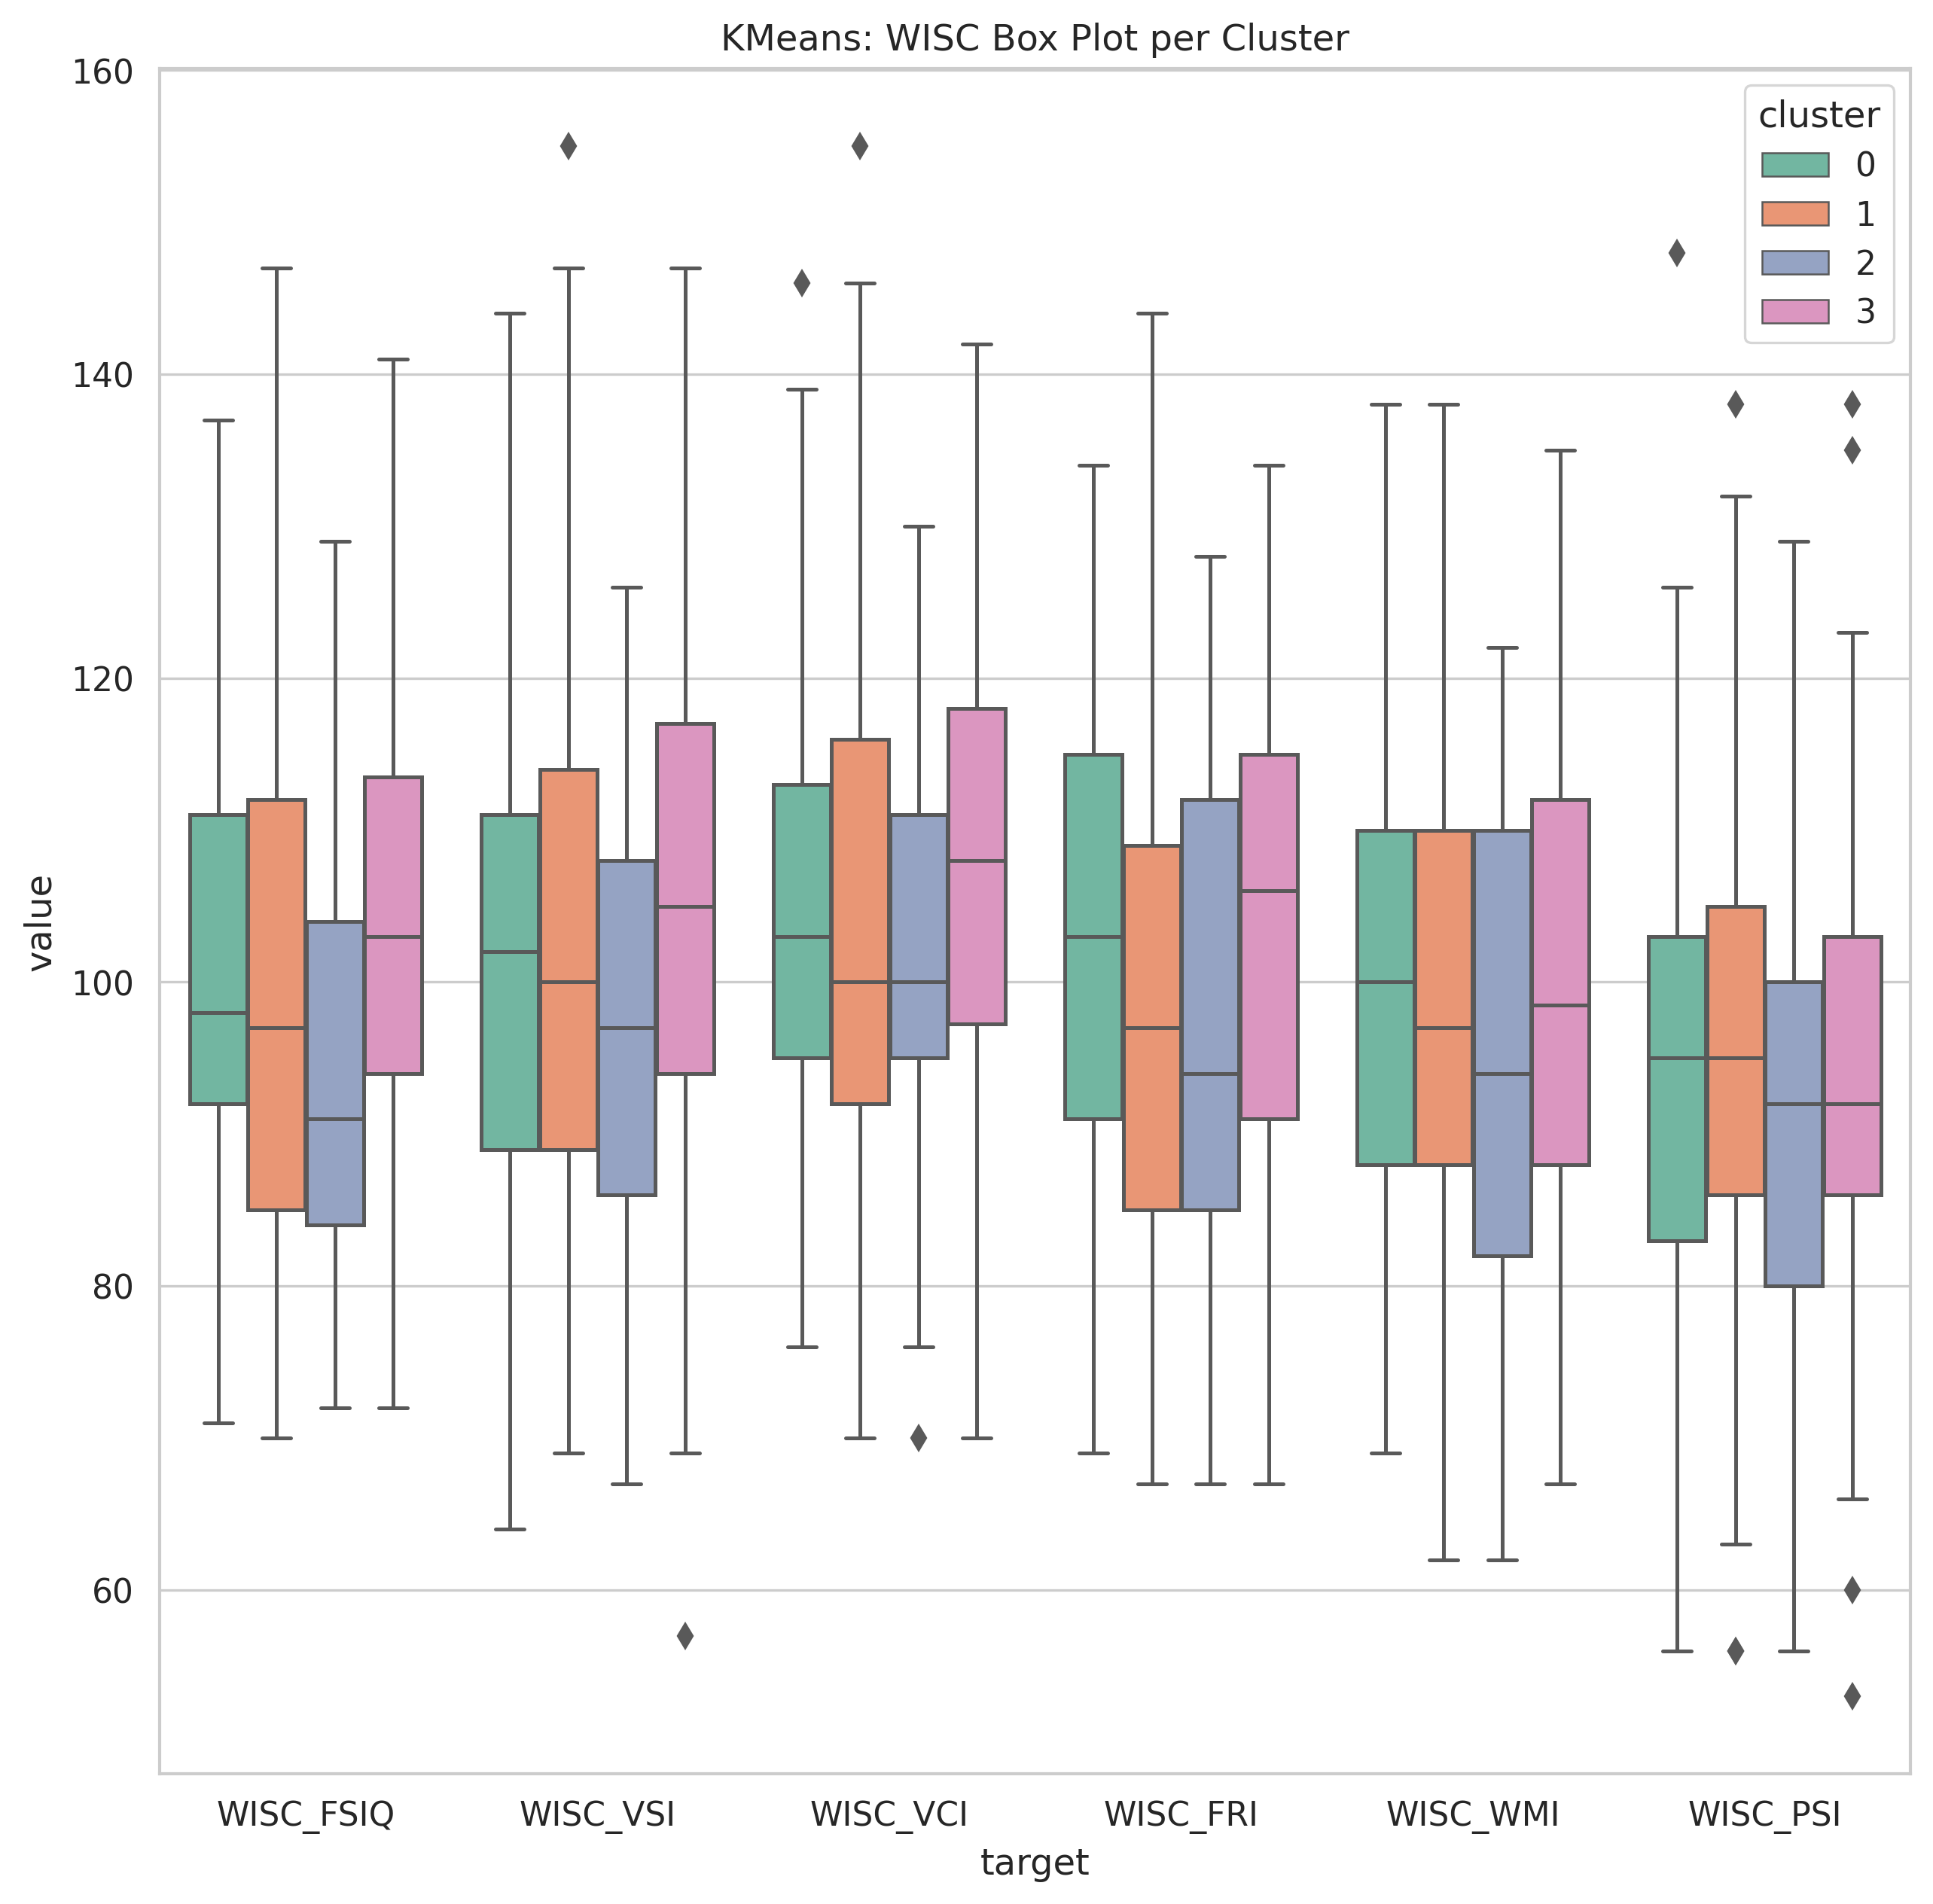

In [28]:
from common.wisc import WISC_LEVEL

data = []

for target in WISC_LEVEL[5]:
    y = Y[target]
    y_clusters = [y[indices] for indices in cluster_indices]
    
    print(target)
    for cluster, y_cluster in enumerate(y_clusters):
#         print(cluster, '[%s]' % ', '.join(map(str, y_cluster)))
        print(f"Cluster {cluster} {target}: {np.mean(y_cluster):.2f} ({np.std(y_cluster):.2f})")
        data += [(cluster, target, value) for value in y_cluster]
    print("---")

#     data += [(1, target, value) for value in y_cluster_one]
#     data += [(2, target, value) for value in y_cluster_two]

data = pd.DataFrame(data, columns=['cluster', 'target', 'value'])
# display(data)
# g = sns.FacetGrid(data, col="cluster", row="target")
# g.map_dataframe(sns.boxplot, x='value', orient='v')

ax = sns.boxplot(x='target', y='value', hue='cluster', data=data, palette="Set2", 
                 order=WISC_LEVEL[5], orient='v')
ax.set_title('KMeans: WISC Box Plot per Cluster')